## Logistic Regression
### Problem statement:
 The problem that we are going to solve here is thta given a set of features thta describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data. We will be using [Claim Data](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv)

### Linear regression: 
- used When the data is continuous
### Logistic Regresion:
- used When data is categorical and it is a classification problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


### Dropping CASENUM column

In [3]:
df.drop(['CASENUM'],axis=1,inplace=True)
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [4]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [5]:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
#df['CLMSEX']=df['CLMSEX'].fillna()
#df['CLMINSUR']=df['CLMINSUR'].fillna()
#;;;
#;;;   #user defined function that passes all the column names in the above same pattern

In [7]:
# imputing mode for the missing values
# as mode will impute for numerical and categorical data
# data["CLMSEX"]=data["CLMSEX"].fillna()
# data["CLMINSUR"]=data["CLMINSUR"].fillna()
# data["SEATBELT"]=data["SEATBELT"].fillna()
# data["CLMAGE"]=data["CLMAGE"].fillna()
 # OR
# Lambda--> lambda argumnets :expression
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
df.apply(lambda col:fill_na(col))

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,10.0,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [8]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

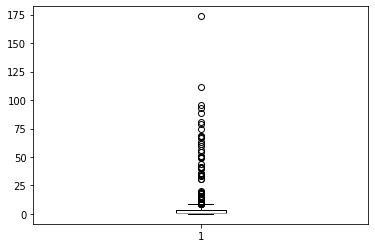

In [9]:
# Loss Column
plt.boxplot(df.LOSS)
plt.show()

--> Data entry mistake
1. Outliers also missing values -->Imputation
2. Winsorization--> Outliers are replaced with the next small value
 - Exmaple;[1,2,3,4,5,6,78,88,9000]
 - 9000 is an outlier -> 9000 will be replaced with 89
     - One analysis-> Include all the outliers
     - One analysis--> Drop all the outliers
 

In [10]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [11]:
#Syntax: iloc-row indices, column indices
df.iloc[1:,1:] #indices of the columns which we need to access

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
5,1.0,1.0,0.0,35.0,0.309
...,...,...,...,...,...
1335,0.0,1.0,0.0,10.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


### Split the data into Input and Output

In [12]:
X=df.iloc[:,1:]
y=df.ATTORNEY

In [13]:
#Split the data into training and testing
#Build the model on training data and check the model performance
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
X_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
466,1.0,1.0,0.0,50.0,0.045
1185,1.0,1.0,0.0,34.0,0.674
471,0.0,1.0,0.0,10.0,0.470
984,1.0,1.0,0.0,19.0,4.009
97,0.0,1.0,0.0,1.0,34.571
...,...,...,...,...,...
763,0.0,1.0,0.0,60.0,0.000
835,1.0,1.0,0.0,30.0,0.300
1216,1.0,1.0,0.0,10.0,0.339
559,1.0,1.0,0.0,10.0,0.105


In [15]:
#build the classifier on training data
#sklearn library:import,instantiate,fit
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

c:\users\srinaja\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting on train data:

In [16]:
#Syntax: objectName.predict(Input)
y_train_pred=reg.predict(X_train)
y_train_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [17]:
#Confusion matrix for training data
#Confusion matrix(Actual values,Predicted values)
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_train,y_train_pred)
conf

array([[285, 176],
       [ 96, 381]], dtype=int64)

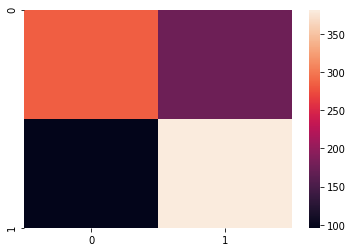

In [18]:
sns.heatmap(conf)
#0-> Not hiring attorney
#1-> Hiring attorney
#X-axis-> Actual values
#Y-axis-> Predicted values
#0,0 -> TN
#0,1->FN
#1,0-> FP
#1,1-> TP

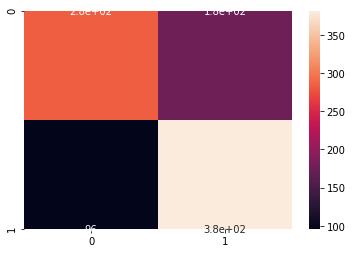

In [19]:
#another way
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

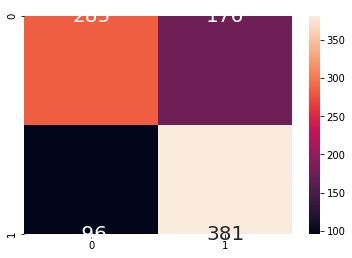

In [20]:
#Formatting the values into proper numbers
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [21]:
#Accuracy: TP+TN/TP+FP+TN+FN
conf[0][0] #->True Positive

285

In [22]:
conf[0][1] #False positive

176

In [23]:
conf[1][0] #False negative

96

In [24]:
conf[1][1] #True negative

381

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7100213219616205

In [26]:
true_positive = conf[0][0]
false_positive=conf[0][1]
false_negative=conf[1][0]
true_negative=conf[1][1]

## Precision rate

In [27]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6840215439856373

In [28]:
## precision 
precision=true_positive/(true_positive+false_positive)
precision

0.6182212581344902

## Recall:
 - Out of all the actual values , how many are correctly classified

In [29]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.7480314960629921

In [30]:
#Calculating f1_score for train data
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred)

0.7369439071566731

In [31]:
#Prediction on test data
#Calculate the metrics for test data->confusion matrix
#precision,Accuracy,recall,f1_score
#Compare the score with training data

In [32]:
#project
#Visualize all the columns in your data
#Correlation

### Day 31(29-06-2020)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))
#syntax->classification_report(actual values, predicted values)

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       461
           1       0.68      0.80      0.74       477

    accuracy                           0.71       938
   macro avg       0.72      0.71      0.71       938
weighted avg       0.72      0.71      0.71       938



### KNN:
 - The one that relies on labeled input data
     - Labeled input data: Input as well as output
 - Can be used for classigication, Regression kind of problems(Both)
 - The algorithm works based on 'distance'(valid for only continuos variables)->
     - Analyses similarities , Works on similarities
 - K-> No.of nearest neighbours
 - KNN assumes that similar things exist in close proximity(distance)
 - Calculates min distance:
     - Eucledian method
     - Manhattan distance/ City block Distance:
 - Example: Spam and not spam(Ham):
     - Another mail comes, we've to find if it's spam or ham
     - 1NN-> Takes one nearest point
     - 2NN-> Takes two nearest ponts
     - So on